## Fake Currency Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./DataSets/FakeCurrencyModel.csv")
df.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
Target        int64
dtype: object

In [5]:
df.shape

(1372, 5)

In [6]:
df['Target'].value_counts()

0    762
1    610
Name: Target, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

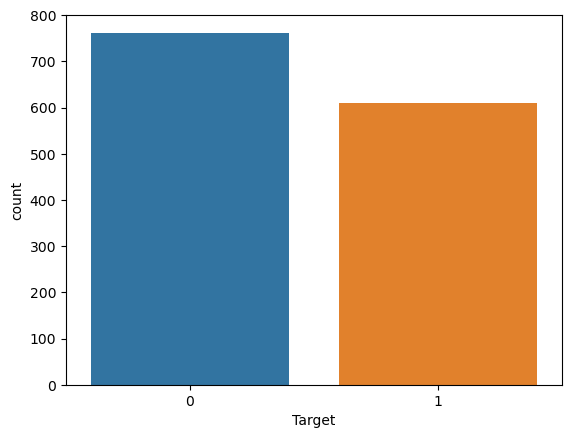

In [7]:
sns.countplot(df['Target'], label="count")

In [8]:
df.describe() 

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'curtosis'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

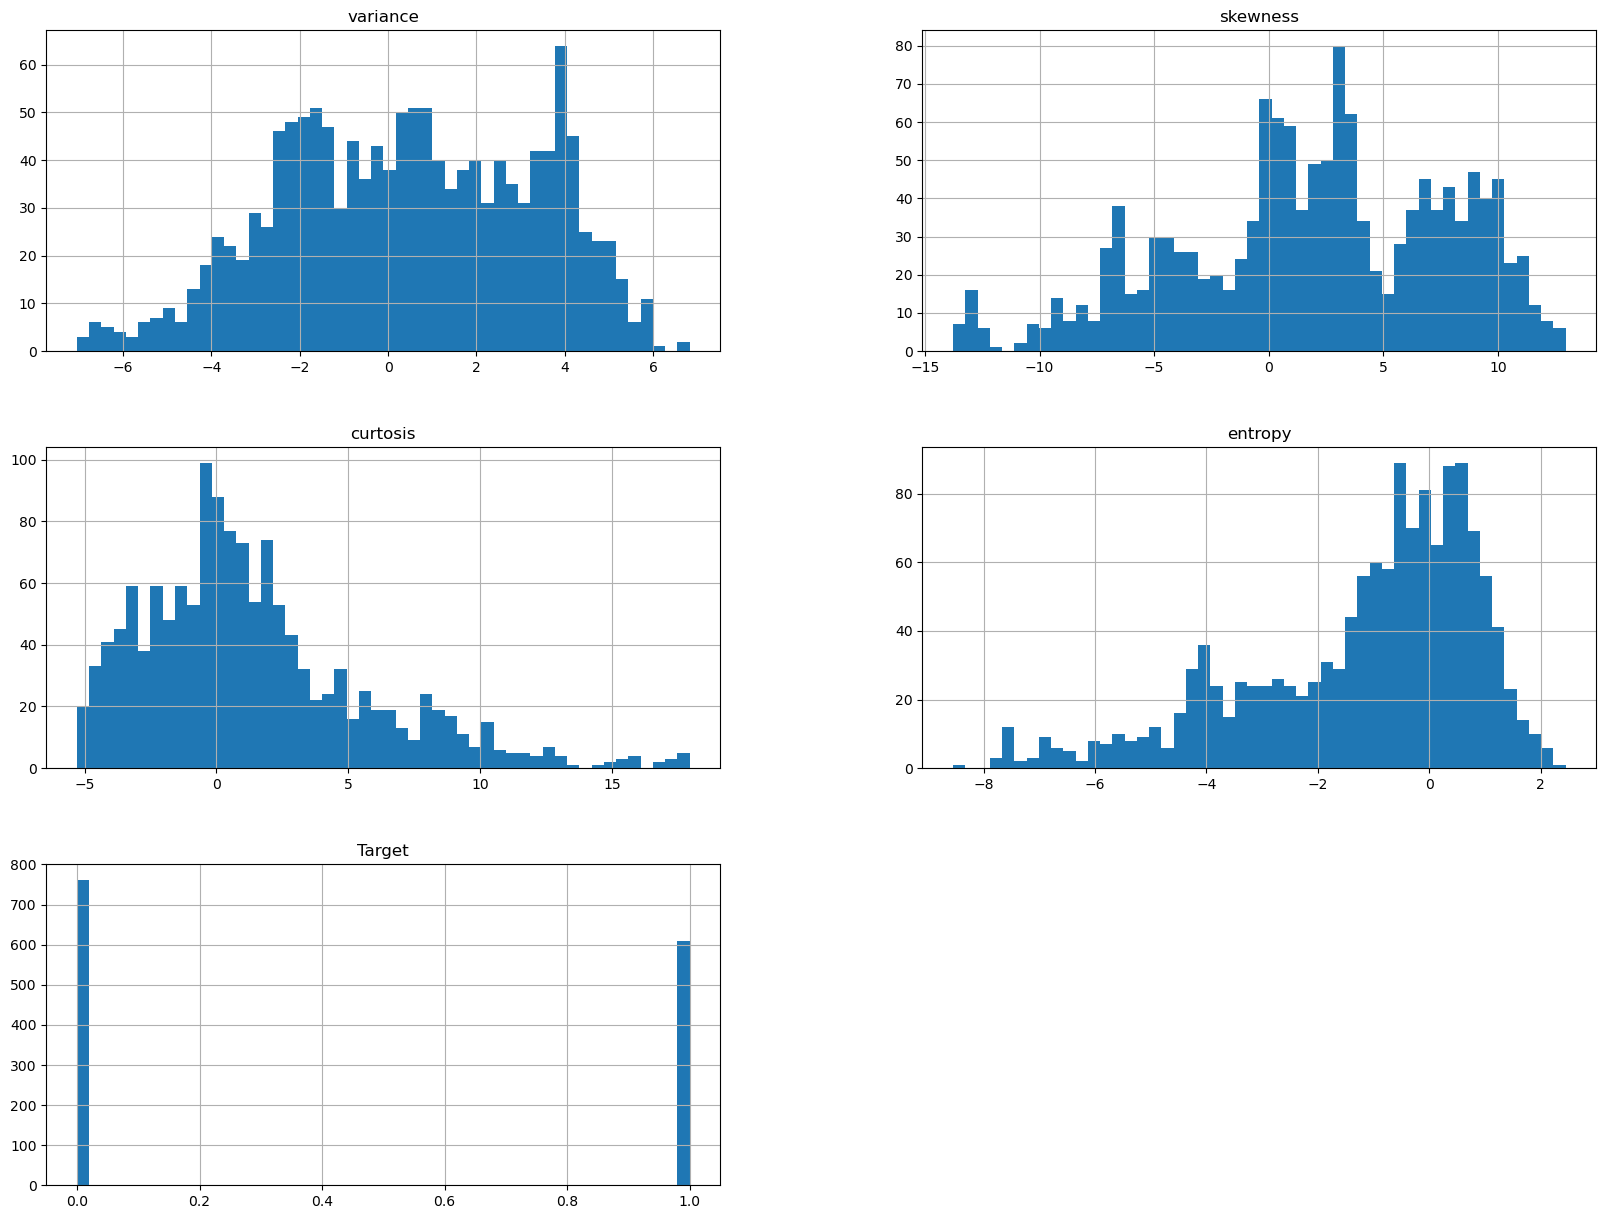

In [10]:
df.hist(bins=50, figsize= (20,15))

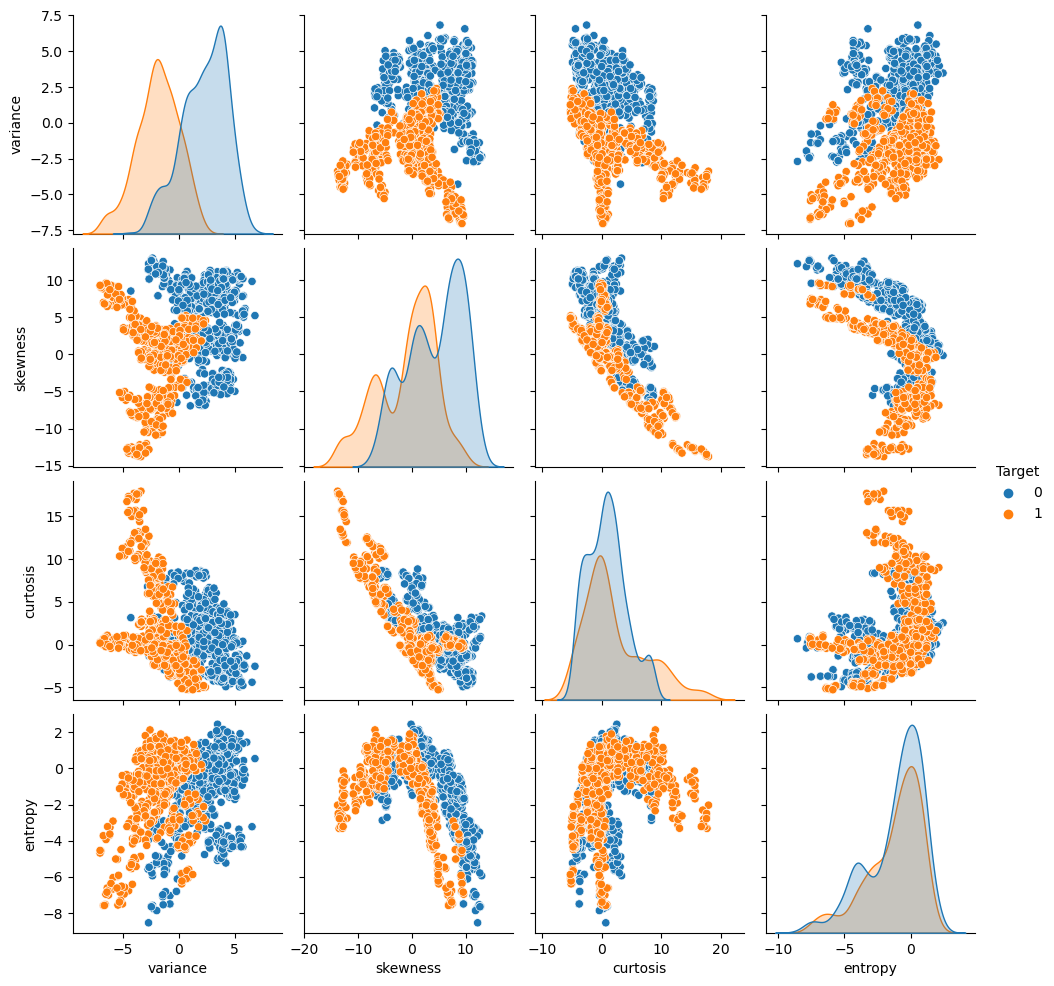

In [11]:
sns.pairplot(df, hue='Target')

In [12]:
y = df['Target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [13]:
x = df.drop('Target',axis=1)

In [14]:
var = pd.DataFrame(x)

In [15]:
var.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [16]:
var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(var, y, test_size=0.3, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=0, multi_class='auto')
regressor.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
regressor.fit(x_train,y_train)
regressor_pred = regressor.predict(x_test)
print (confusion_matrix(y_test,regressor_pred))
print('\n')
print (classification_report(y_test,regressor_pred))
print('\n')
print (accuracy_score(y_test,regressor_pred))


[[223   6]
 [  2 181]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       229
           1       0.97      0.99      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



0.9805825242718447


# RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=12)
forest.fit(x_train,y_train)
forest_pred = forest.predict(x_test)
print (confusion_matrix(y_test,forest_pred))
print('\n')
print (classification_report(y_test,forest_pred))
print('\n')
print (accuracy_score(y_test,forest_pred))

[[229   0]
 [  1 182]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



0.9975728155339806


# DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
print (confusion_matrix(y_test,tree_pred))
print('\n')
print (classification_report(y_test,tree_pred))
print('\n')
print (accuracy_score(y_test,tree_pred))

[[225   4]
 [  5 178]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       229
           1       0.98      0.97      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



0.9781553398058253
